<a href="https://colab.research.google.com/github/RafaelMagnusson1/Kaggle_comp/blob/main/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/Data Science/Kaggle/Data/Housing/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Data Science/Kaggle/Data/Housing/test.csv")

## Initial exploration

In [3]:
df_label = df_train[["SalePrice"]]
df_train_X = df_train.drop("SalePrice",axis = 1)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Creating a dataframe containing only numerical data

In [6]:
df_train_num = df_train.select_dtypes(include = [np.number])

In [7]:
df_train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
corr_matrix = df_train_num.corr()

corr_matrix["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Creating a dataframe containing only categorical data

In [9]:
df_train_cat =  df_train.select_dtypes(include = [object])

In [10]:
df_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Data Cleaning

In [11]:
df_train_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(strategy = "most_frequent")
X = imputer.fit_transform(df_train_num)

In [14]:
df_train_num_tr = pd.DataFrame(X, columns = df_train_num.columns , index = df_train_num.index) #Transforming back into a dataframe

In [15]:
df_train_num_tr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [16]:
df_train_num_tr.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [17]:
df_train_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

# Exploratory Data Analysis

Categorical data

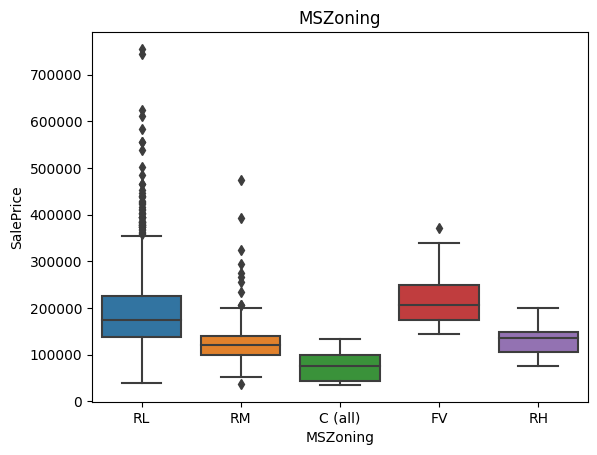

In [18]:
ax = sns.boxplot(df_train, x = "MSZoning", y = "SalePrice")
ax.set_title("MSZoning")

plt.show()

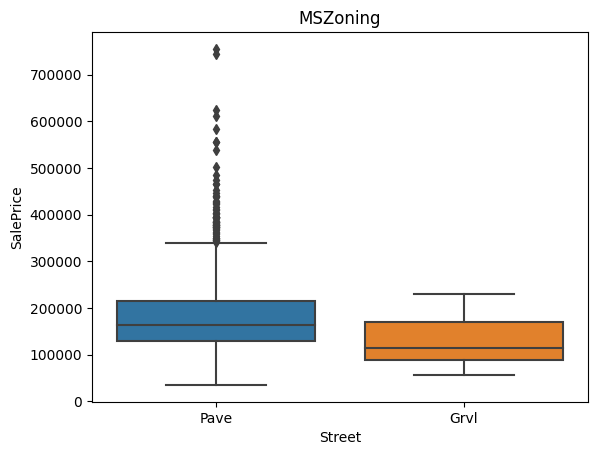

In [19]:
ax = sns.boxplot(df_train, x = "Street", y = "SalePrice")
ax.set_title("MSZoning")

plt.show()

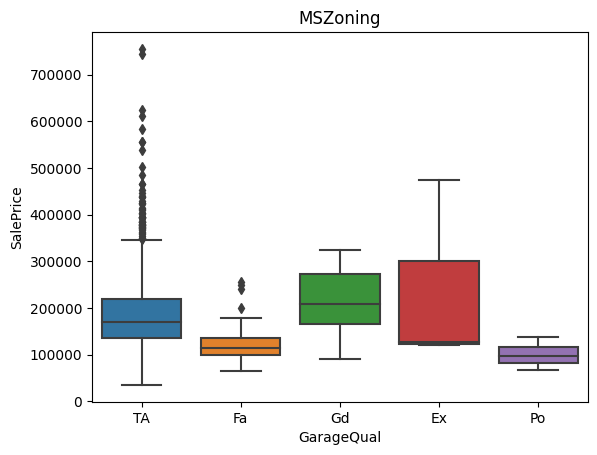

In [20]:
ax = sns.boxplot(df_train, x = "GarageQual", y = "SalePrice")
ax.set_title("MSZoning")

plt.show()

Numerical Data

In [21]:
corr_matrix["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

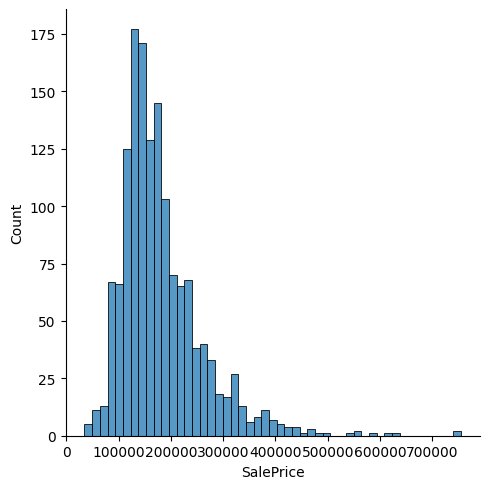

In [22]:
ax = sns.displot(df_train["SalePrice"])
plt.show()

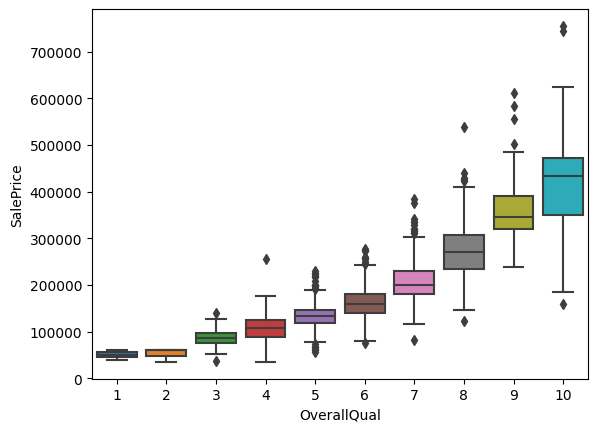

In [23]:
ax = sns.boxplot(data = df_train, x="OverallQual", y = "SalePrice")
plt.show()

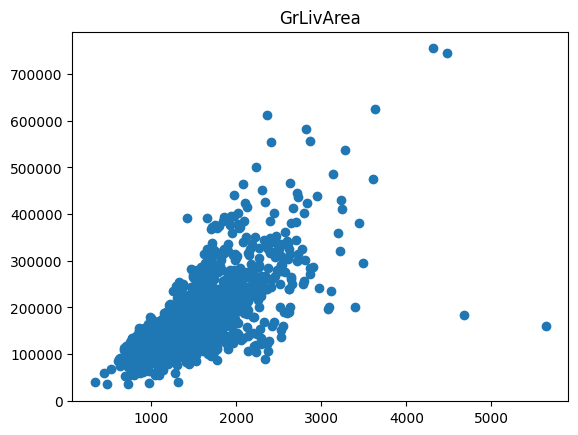

In [24]:
plt.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plt.title("GrLivArea")
plt.show()

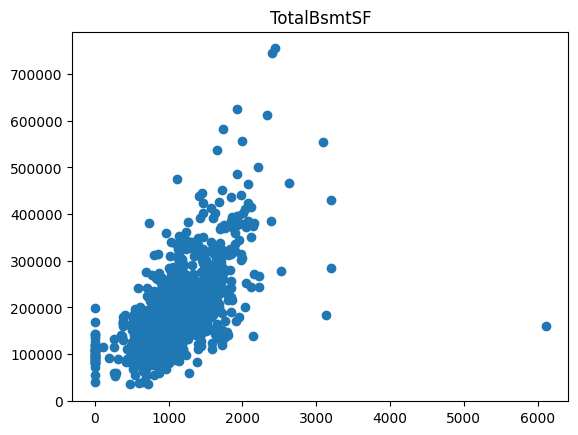

In [25]:
plt.scatter(df_train["TotalBsmtSF"], df_train["SalePrice"])
plt.title("TotalBsmtSF")
plt.show()

# Data Preparation

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Crating a pipeline to deal with numerical data

In [27]:
num_features = corr_matrix["SalePrice"].sort_values(ascending = False)

In [28]:
num_features

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [29]:
num_features_selected = num_features.index[1:10]

In [30]:
num_features_selected

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [31]:
num_pipeline = Pipeline([
    ("inputer",SimpleImputer(strategy = "most_frequent")),
                         ("std_scaler", StandardScaler())])

In [32]:
df_train_num_tr = num_pipeline.fit_transform(df_train_num)

In [33]:
df_train_num_tr

array([[-1.73086488,  0.07337496, -0.14618854, ..., -1.5991111 ,
         0.13877749,  0.34727322],
       [-1.7284922 , -0.87256276,  0.52499153, ..., -0.48911005,
        -0.61443862,  0.00728832],
       [-1.72611953,  0.07337496, -0.01195252, ...,  0.99089135,
         0.13877749,  0.53615372],
       ...,
       [ 1.72611953,  0.30985939, -0.1014432 , ..., -0.48911005,
         1.64520971,  1.07761115],
       [ 1.7284922 , -0.87256276, -0.01195252, ..., -0.8591104 ,
         1.64520971, -0.48852299],
       [ 1.73086488, -0.87256276,  0.30126484, ..., -0.1191097 ,
         0.13877749, -0.42084081]])

Creating a pipeline to deal with categorical data

In [34]:
attr  = ['Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual',
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive','FireplaceQu', 'PoolQC','Exterior1st']

In [35]:
attr2 = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive','FireplaceQu', 'PoolQC']

In [36]:
cat_features_selected = df_train_cat.columns.drop(attr)

In [37]:
cat_features_selected

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'MasVnrType',
       'Electrical', 'Functional', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [38]:
cat_pipeline = Pipeline([
    ("1Hot",OneHotEncoder())])

In [39]:
df_train_cat_tr = cat_pipeline.fit_transform(df_train_cat)

In [40]:
df_train_cat_tr

<1460x268 sparse matrix of type '<class 'numpy.float64'>'
	with 62780 stored elements in Compressed Sparse Row format>

Utilizing Column Transformer

In [41]:
num_attribs = list(num_features_selected)
cat_attribs = list(cat_features_selected)

In [42]:
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),("cat",cat_pipeline,cat_attribs)])

In [43]:
df_train_prepared = full_pipeline.fit_transform(df_train)

In [44]:
df_train_prepared.shape

(1460, 70)

# Training the model

Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lin_reg = LinearRegression()

In [47]:
lin_reg.fit(df_train_prepared,df_label)

LinearRegression()

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
lin_reg_pred = lin_reg.predict(df_train_prepared)

In [50]:
mse_lin_reg = mean_squared_error(df_label,lin_reg_pred)

In [51]:
rmse_lin_reg = np.sqrt(mse_lin_reg)

In [52]:
print(rmse_lin_reg)

35675.387662848465


Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
tree_reg = DecisionTreeRegressor()

In [55]:
tree_reg.fit(df_train_prepared,df_label)

DecisionTreeRegressor()

In [56]:
tree_reg_pred = tree_reg.predict(df_train_prepared)

In [57]:
mse_tree_reg = mean_squared_error(df_label, tree_reg_pred)

In [58]:
rmse_tree_reg = np.sqrt(mse_tree_reg)

In [59]:
print(rmse_tree_reg) #Maybe this model is overfitted

684.3854142261358


RandomForestRegressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_train_prepared, df_label)

<ipython-input-60-5367373742b9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(df_train_prepared, df_label)


RandomForestRegressor(random_state=42)

In [61]:
forest_pred = forest_reg.predict(df_train_prepared)
forest_mse = mean_squared_error(df_label, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11771.183261390475

# Model Validation

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_train_prepared, df_label, test_size = 0.2)

In [64]:
print(X_train.shape)
print(y_train.shape)

(1168, 70)
(1168, 1)


Linear Regression

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg_pred = lin_reg.predict(X_test)

In [66]:
mse_lin_reg = mean_squared_error(y_test,lin_reg_pred)
rmse_lin_reg = np.sqrt(mse_lin_reg)
rmse_lin_reg

574084910056292.8

Decision Tree Regressor

In [67]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
tree_reg_pred = tree_reg.predict(X_test)

In [68]:
mse_tree_reg = mean_squared_error(y_test, tree_reg_pred)
rmse_tree_reg = np.sqrt(mse_tree_reg)
rmse_tree_reg #This model is overfitted

38032.81219876563

RandomForest Regressor

In [69]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train.values.ravel())
forest_pred = forest_reg.predict(X_test)

In [70]:
forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

27230.13560091339

# Model Oprimization

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = [
    {'n_estimators': [3, 10, 30 , 50 , 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [73]:
forest_reg_opt = RandomForestRegressor()

In [74]:
grid_search = GridSearchCV(forest_reg_opt, param_grid, cv = 5 , scoring = "neg_mean_squared_error", return_train_score = True)

In [75]:
grid_search.fit(df_train_prepared, df_label.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

Evaluating the RMSE for the model with the hyperparameters optimized

In [77]:
forest_reg_opt1 = RandomForestRegressor(n_estimators=100, random_state=42 , max_features = 8)
forest_reg_opt1.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_features=8, random_state=42)

In [78]:
forest_pred = forest_reg_opt1.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

29184.776295380358

# Using the model to subbmit

In [79]:
lin_reg = LinearRegression()
lin_reg.fit(df_train_prepared,df_label)

LinearRegression()

preparing the test set

In [80]:
df_test.shape

(1459, 80)

In [81]:
df_train.shape

(1460, 81)

In [82]:
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),("cat",cat_pipeline,cat_attribs)])

In [83]:
num_attribs

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [84]:
df_test_prepared = full_pipeline.fit_transform(df_test)

In [85]:
df_test_prepared.shape

(1459, 70)

In [86]:
df_train_prepared.shape

(1460, 70)

Submitting data

In [90]:
submission = lin_reg.predict(df_test_prepared)

In [91]:
submission_df = pd.DataFrame({'Id': df_test["Id"].values, 'SalePrice': submission.ravel()})
submission_df.to_csv('BostonHousing.csv',index=False)